# Descriptive statistics

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pingouin as pg
from basics import alpha, normalize_auc, normalize_rt, get_auc

d = pd.read_csv(os.path.join("..", "data", "data.csv"), index_col=0)

print("Loading:", len(d), "lines", len(d["ParticipantID"].unique()), "participants")

Loading: 15768 lines 219 participants


## Participants

In [6]:
TPP = 72  # there are 72 trials per participant
TPT = 36  # there are 36 trials per test
TPL = 20  # there are 20 trials per lexical test

for sid in [1, 2]:
    dt = d[d["StudyID"] == sid]
    if not dt.empty:
        print()
        print()
        print("## Counts for study ID:", sid)
        print()
        print("Number of participants:")
        print(len(dt) / TPP) 
        print()
        print("Fluent vs. non-fluent:")
        display(pd.DataFrame(dt["Fluent"].value_counts() / TPP))
        print()
        print("Different kinds of designers and which font was first:")
        
        dtt = pd.DataFrame(columns=["Designer", "Non-designer", "total"], index=["sansforgetica", "arial", "total"])
        dtt["Designer"] = dt[(dt["TestID"] == 1) & (dt["Type"] == "lexical") & (dt["Training"] != "Non-designer")]["Font"].value_counts()
        dtt["Non-designer"] = dt[(dt["TestID"] == 1) & (dt["Type"] == "lexical") & (dt["Training"] == "Non-designer")]["Font"].value_counts()
        dtt /=  TPL
        dtt["total"] = dtt.T.sum()
        dtt.loc["total"] = dtt.sum()
        display(dtt)
        print()
        display(pd.DataFrame(dt["Training"].value_counts() / TPP))

        print("JoM for categories of training:")
        display(pd.DataFrame(dt.groupby("Training")["JoM"].mean()))
        print()
        print("JoL for categories of training:")
        display(pd.DataFrame(dt.groupby("Training")["JoL"].value_counts() / TPT))




## Counts for study ID: 1

Number of participants:
97.0

Fluent vs. non-fluent:


Fluent
True     89.0
False     8.0


Different kinds of designers and which font was first:


Designer  Non-designer  total
sansforgetica      26.0          21.0   47.0
arial              27.0          23.0   50.0
total              53.0          44.0   97.0

Training
Non-designer          44.0
Letter designer       25.0
Graphic designer      17.0
Other designer         6.0
Typographer            5.0

JoM for categories of training:


JoM
Training                   
Graphic designer  56.735294
Letter designer   55.160000
Non-designer      53.977273
Other designer    49.166667
Typographer       61.000000


JoL for categories of training:


JoL
Training         JoL                         
Graphic designer very easy to read       13.0
                 ok                      10.0
                 easy to read             5.0
                 difficult to read        4.0
                 very difficult to read   2.0
Letter designer  very easy to read       14.0
                 difficult to read       13.0
                 ok                      11.0
                 easy to read             9.0
                 very difficult to read   3.0
Non-designer     very easy to read       38.0
                 ok                      22.0
                 difficult to read       14.0
                 easy to read            12.0
                 very difficult to read   2.0
Other designer   very easy to read        5.0
                 ok                       4.0
                 difficult to read        2.0
                 very difficult to read   1.0
Typographer      very easy to read        4.0
                 difficult to read        3.0
                 ok                       2.0
                 easy to read             1.0



## Counts for study ID: 2

Number of participants:
122.0

Fluent vs. non-fluent:


Fluent
True    106.0
False    16.0


Different kinds of designers and which font was first:


Designer  Non-designer  total
sansforgetica      31.0          29.0   60.0
arial              32.0          30.0   62.0
total              63.0          59.0  122.0

Training
Non-designer          59.0
Graphic designer      28.0
Letter designer       16.0
Other designer        12.0
Typographer            7.0

JoM for categories of training:


JoM
Training                   
Graphic designer  53.875000
Letter designer   59.562500
Non-designer      52.237288
Other designer    53.083333
Typographer       59.000000


JoL for categories of training:


JoL
Training         JoL                         
Graphic designer very easy to read       23.0
                 difficult to read       12.0
                 ok                      11.0
                 easy to read            10.0
Letter designer  difficult to read       13.0
                 easy to read             7.0
                 very easy to read        7.0
                 ok                       4.0
                 very difficult to read   1.0
Non-designer     very easy to read       51.0
                 ok                      26.0
                 difficult to read       18.0
                 easy to read            17.0
                 very difficult to read   6.0
Other designer   very easy to read        8.0
                 difficult to read        6.0
                 easy to read             5.0
                 ok                       4.0
                 very difficult to read   1.0
Typographer      ok                       6.0
                 very easy to read        5.0
                 easy to read             3.0

# Asess normality of RTs

Normality test for RTnorms in lexical task


W          pval  normal
RTnorm  0.95118  1.909781e-16   False

Normality test for RTnorms in lexical task (outliers replaced)


W          pval  normal
RTnorm  0.949008  7.829168e-17   False

Normality test for RTnorms in recognition task


W          pval  normal
RTnorm  0.95118  1.909781e-16   False

Normality test for RTnorms in recognition task (outliers replaced)


W          pval  normal
RTnorm  0.949008  7.829168e-17   False

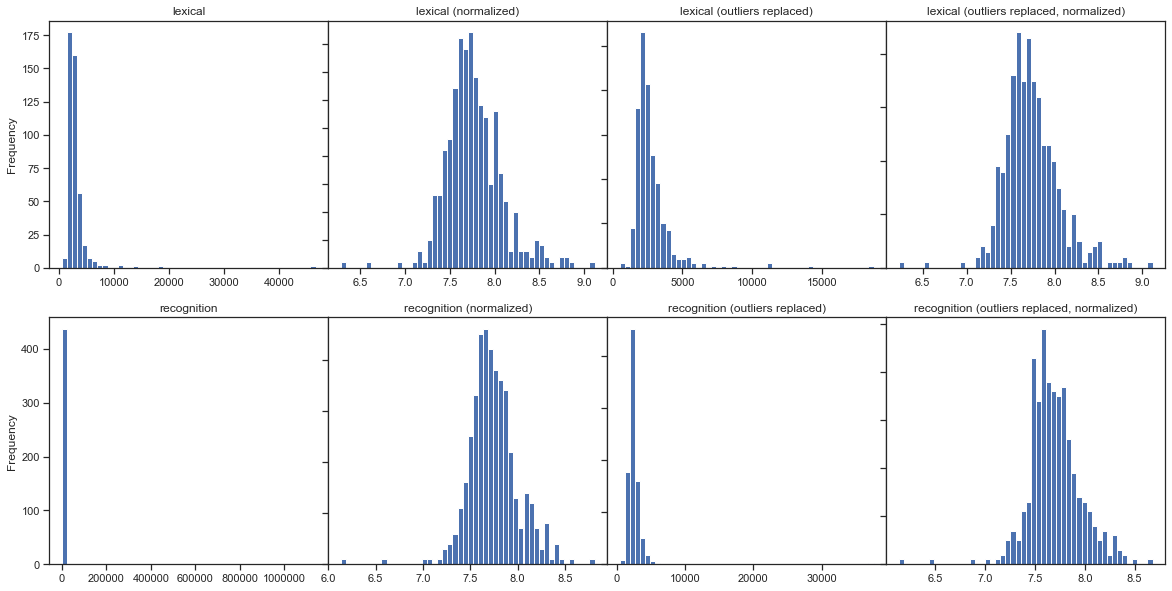

In [5]:
# assess normality of RTs

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
plt.subplots_adjust(wspace=0, hspace=0.2)
for i, ttype in enumerate(["lexical", "recognition"]):
    rts = results[results["Type"] == ttype]["RT"]
    rts.plot.hist(bins=50, ax=axes[i][0], sharey=True, title="%s" % ttype)
    rts = results[results["Type"] == ttype]["RTnorm"]
    rts.plot.hist(bins=50, ax=axes[i][1], sharey=True, title="%s (normalized)" % ttype)
    
    rts = resultswo[resultswo["Type"] == ttype]["RT"]
    rts.plot.hist(bins=50, ax=axes[i][2], sharey=True, title="%s (outliers replaced)" % ttype)
    rts = resultswo[resultswo["Type"] == ttype]["RTnorm"]
    rts.plot.hist(bins=50, ax=axes[i][3], sharey=True, title="%s (outliers replaced, normalized)" % ttype)
    
# test for normality
# null hypothesis: RTs come from a normal distribution
for ttype in ["lexical", "recognition"]:
    for col in ["RTnorm"]:
        print("Normality test for %ss in %s task" % (col, ttype))
        display(pg.normality(results[col]))
        print("Normality test for %ss in %s task (outliers replaced)" % (col, ttype))
        display(pg.normality(resultswo[col]))

Q-Q plot for Lexical
Q-Q plot for Recognition


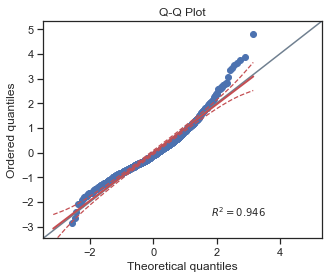

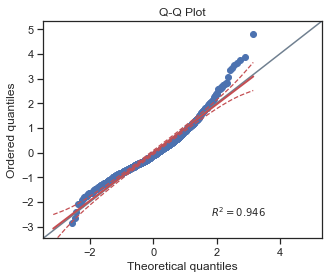

In [6]:
# Q-Q plots
for ttype in ["lexical", "recognition"]:
    for col in ["RTnorm"]:
        print("Q-Q plot for", ttype.title())
        pg.qqplot(resultswo["RTnorm"], dist='norm')